# Data Analysis

In [1]:
from db_utils import DataTransform, Plotter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.tseries.offsets import DateOffset

dt = DataTransform()
visualise = Plotter()

df = dt.read_data('cleaned_loan_data.csv')

## 1. Current State of Loans

Summarise what percentage of the loans are paid back compared to the total payment expected with interest.

In [2]:
df['total_payment_exp'] = df['instalment'] * df['term_(months)']

df['percentage_rec'] = round(df['total_payment'] / df['total_payment_exp'] * 100, 2) 

df['final_payment_date'] = df.apply(lambda row: row['issue_date'] + DateOffset(months=row['term_(months)']), axis=1)

df['term_remaining'] = ((df['final_payment_date'] - df['last_payment_date']).dt.days / 30).astype(int)

df['total_remaining'] = df['total_payment_exp'] - df['total_payment']

task1_df = df[['loan_amount', 'term_(months)', 'instalment', 'total_payment', 'total_rec_int', 'total_payment_exp', 'issue_date', 'last_payment_date', 'final_payment_date', 'percentage_rec', 'months_remaining', 'total_remaining', 'term_remaining']].copy()

task1_df.head()

TypeError: can only concatenate str (not "DateOffset") to str

In [ ]:
total_payments_paid_back = task1_df['total_payment'].sum()
print(f'Total payments paid back: {total_payments_paid_back:.2f}')

total_payments_expected = task1_df['total_payment_exp'].sum()
print(f'Total payments expected: {total_payments_expected:.2f}')

percentage_paid_back = round(total_payments_paid_back / total_payments_expected * 100, 2)
print(f'Percentage paid back: {percentage_paid_back}%')

Total payments paid back: 654923855.12
Total payments expected: 926663991.36
Percentage paid back: 70.68%


### Prediction of payments made in 6 months time

In [ ]:
conditions = [
    task1_df['term_remaining'] >= 6,
    task1_df['term_remaining'] < 6
]

results = [(task1_df['instalment'] * 6), (task1_df['instalment'] * task1_df['term_remaining']) ]

task1_df['next_6mths'] = np.select(conditions, results)

task1_df.head()

,loan_amount,term_(months),instalment,total_payment,total_rec_int,total_payment_exp,issue_date,last_payment_date,final_payment_date,percentage_rec,months_remaining,total_remaining,term_remaining,next_6mths
0,8000.0,36,248.82,2982.51,512.21,8957.52,2021-01-01,2022-01-01,2024-01-01,33.30,24,5975.01,24,1492.92
1,13200.0,36,407.52,4885.11,787.94,14670.72,2021-01-01,2022-01-01,2024-01-01,33.30,24,9785.61,24,2445.12
2,16000.0,36,497.63,16824.54,824.54,17914.68,2021-01-01,2021-10-01,2024-01-01,93.91,27,1090.14,27,2985.78
3,15000.0,36,514.93,15947.47,947.47,18537.48,2021-01-01,2021-06-01,2024-01-01,86.03,31,2590.01,31,3089.58
4,15000.0,36,456.54,5473.46,770.93,16435.44,2021-01-01,2022-01-01,2024-01-01,33.30,24,10961.98,24,2739.24


In [ ]:

task1_df['total_after_6mths'] = task1_df['next_6mths'] + task1_df['total_payment']

conditions = [
    task1_df['total_after_6mths'] > task1_df['total_payment_exp'],
    task1_df['total_after_6mths'] <= task1_df['total_payment_exp']
]

results = [(task1_df['total_payment_exp']), task1_df['total_after_6mths']]

task1_df['total_after_6mths'] = np.select(conditions, results)

total_rec_after_6_months = task1_df['total_after_6mths'].sum()
print(f'Total received after 6 months: {total_rec_after_6_months:.2f}')

percentage_paid_back_after_6mths = round(total_rec_after_6_months / total_payments_expected * 100, 2)
print(f'Percentage paid back after 6 months: {percentage_paid_back_after_6mths}%')

Total received after 6 months: 740762190.42
Percentage paid back after 6 months: 79.94%


In [ ]:
task1_df['percentage_rec_6mths'] = round(task1_df['total_after_6mths'] / task1_df['total_payment_exp'] * 100, 2)

task1_df.head()

,loan_amount,term_(months),instalment,total_payment,total_rec_int,total_payment_exp,issue_date,last_payment_date,final_payment_date,percentage_rec,months_remaining,total_remaining,term_remaining,next_6mths,total_after_6mths,percentage_rec_6mths
0,8000.0,36,248.82,2982.51,512.21,8957.52,2021-01-01,2022-01-01,2024-01-01,33.30,24,5975.01,24,1492.92,4475.43,49.96
1,13200.0,36,407.52,4885.11,787.94,14670.72,2021-01-01,2022-01-01,2024-01-01,33.30,24,9785.61,24,2445.12,7330.23,49.97
2,16000.0,36,497.63,16824.54,824.54,17914.68,2021-01-01,2021-10-01,2024-01-01,93.91,27,1090.14,27,2985.78,17914.68,100.00
3,15000.0,36,514.93,15947.47,947.47,18537.48,2021-01-01,2021-06-01,2024-01-01,86.03,31,2590.01,31,3089.58,18537.48,100.00
4,15000.0,36,456.54,5473.46,770.93,16435.44,2021-01-01,2022-01-01,2024-01-01,33.30,24,10961.98,24,2739.24,8212.70,49.97


In [ ]:
print(f'Total payments paid back: {total_payments_paid_back:.2f}')
print(f'Total payments expected: {total_payments_expected:.2f}')
print(f'Current percentage paid back: {percentage_paid_back}%')
print(f'Predicted percentage paid back after 6 months: {percentage_paid_back_after_6mths}%')

Total payments paid back: 654923855.12
Total payments expected: 926663991.36
Current percentage paid back: 70.68%
Predicted percentage paid back after 6 months: 79.94%


## 2. Calculating Loss

What percentage of loans have been a loss to the company?

In [ ]:
charged_off_mask = (df['loan_status'] == 'Charged Off') + (df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off')
charged_off_df = df.loc[charged_off_mask].copy()
loss_to_company = len(charged_off_df) / len(df) * 100
print(f'Percentage of Charged Off loans: {loss_to_company:.2f}%')

Percentage of Charged Off loans: 10.83%


The total amount that was paid towards these loans before being Charged Off:

In [ ]:

charged_off_payments_rec = charged_off_df['total_payment'].sum()
print(f'Total amount paid towards Charged Off loans: {charged_off_payments_rec:.2f}')

charged_off_total_exp = charged_off_df['total_payment_exp'].sum()
percentage_paid_before_charged_off = charged_off_payments_rec / charged_off_total_exp * 100
print(f'Percentage of loan payment received before they were Charged Off: {percentage_paid_before_charged_off:.2f}%')

Total amount paid towards Charged Off loans: 39151684.33
Percentage of loan payment received before they were Charged Off: 37.05%


## 3. Calculating Projected Loss

In [ ]:
charged_off_df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_(months),int_rate,instalment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,total_payment_exp,percentage_rec,months_remaining,final_payment_date,term_remaining,total_remaining,payment_remaining
7,38656067,41439872,26500.0,26500.0,26200.0,36,19.99,701.95,E,E3,...,0.0,1,INDIVIDUAL,25270.20,16.55,29,2024-01-01,29,20356.55,21087.93
56,38654836,41438603,11200.0,11200.0,11200.0,60,16.49,275.29,D,D3,...,0.0,1,INDIVIDUAL,16517.40,11.54,53,2026-01-01,53,14590.37,14610.89
83,38645937,41429742,1325.0,1325.0,1325.0,36,17.14,47.34,D,D4,...,0.0,1,INDIVIDUAL,1704.24,16.59,30,2024-01-01,30,1420.20,1421.46
90,38645713,41429516,8150.0,8150.0,8150.0,36,19.99,302.85,E,E3,...,0.0,1,INDIVIDUAL,10902.60,16.58,30,2024-01-01,30,9085.50,9094.55
117,38644867,41428644,7000.0,7000.0,7000.0,36,12.99,235.83,C,C2,...,0.0,1,INDIVIDUAL,8489.88,19.48,34,2024-01-01,34,8018.22,6835.74


Projected loss of loans marked as Charged Off and the loss in revenue that these loans would have generated for the company if they had finished their term:

In [ ]:
charged_off_projected_loss = charged_off_df['total_remaining'].sum()

print(f'Projected loss in revenue if Charged Off loans had finished their term: {charged_off_projected_loss}')
percentage_of_revenue_loss = charged_off_projected_loss / (charged_off_df['total_payment_exp'].sum()) * 100
print(f'Percentage of loss of revenue due to Charged Off loans: {percentage_of_revenue_loss:.2f}%')

Projected loss in revenue if Charged Off loans had finished their term: 69794331.5
Percentage of loss of revenue due to Charged Off loans: 66.05%


## 4. Possible Loss

There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.

First, I have created a dataframe showing only customers who are behind on their payments:

In [ ]:
df['months_into_term'] = round((df['last_payment_date'] - df['issue_date']).dt.days / 30).astype(int)
df['current_payment_expected'] = df['months_into_term'] * df['instalment']
# df['overdue_balance'] = df['current_payment_expected'] - df['total_rec']
df['overdue_balance'] = df['current_payment_expected'] - df['total_payment']

behind_mask = df['loan_status'].str.startswith('Late')
behind_df = df.loc[behind_mask].copy()

behind_df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_(months),int_rate,instalment,grade,sub_grade,...,total_payment_exp,percentage_rec,months_remaining,final_payment_date,term_remaining,total_remaining,payment_remaining,months_into_term,current_payment_expected,overdue_balance
17,38655869,41439673,18825.0,18825.0,18825.0,60,13.66,434.72,C,C3,...,26083.20,14.89,51,2026-01-01,51,22170.72,22199.29,9,3912.48,28.57
140,38644147,41427862,15600.0,15600.0,15600.0,36,14.99,540.71,C,C5,...,19465.56,27.71,26,2024-01-01,26,14058.46,14071.45,10,5407.10,12.99
168,38635317,41419102,6000.0,6000.0,6000.0,36,8.67,189.88,B,B1,...,6835.68,27.91,26,2024-01-01,26,4936.88,4927.66,10,1898.80,-9.22
171,38635273,41419056,15000.0,15000.0,15000.0,36,13.16,471.37,A,A5,...,16969.32,22.18,28,2024-01-01,28,13198.36,13205.18,8,3770.96,6.82
243,38625326,41409103,5000.0,5000.0,5000.0,36,11.44,164.74,B,B4,...,5930.64,30.50,25,2024-01-01,25,4118.50,4121.68,11,1812.14,3.18


I will look at the percentage the users in this bracket currently represent of all loans:

In [ ]:
late_percentage = len(behind_df) / len(df) * 100
print(f'Percentage of customers who are currently behind on their loan payments: {late_percentage:.2f}')

Percentage of customers who are currently behind on their loan payments: 1.27


I have calculated the total amount of customers there are and how much loss the company would incur if their status changes to 'Charged Off':



In [ ]:
num_behind_customers = behind_df['member_id'].count()
print(f'There are {num_behind_customers} customers that are behind on their payments.')

There are 686 customers that are behind on their payments.


If the customers that are currently late on payments converted to 'Charged Off', I wonder what percentage of total expected revenue these customers and the customers who have already defaulted on their loans represent?

In [ ]:
late_customers_changed_to_charged_off = (behind_df['total_payment_exp'] - behind_df['total_payment']).sum()
print(f"If the {num_behind_customers} late paying customers' statuses were changed to 'Charged Off', \nPredicted loss for company is {late_customers_changed_to_charged_off:.2f}")

If the 686 late paying customers' statuses were changed to 'Charged Off', 
Predicted loss for company is 7316814.49


In [ ]:
payment_remaining = (behind_df['months_remaining'] * behind_df['instalment']).sum()
loss_if_full_term_carried_out = behind_df['total_payment_exp'].sum() - (behind_df['total_payment'].sum() + payment_remaining)
print(f'The projected loss to the company if the current late paying customers were to finish their loans term is {loss_if_full_term_carried_out:.2f}')


The projected loss to the company if the current late paying customers were to finish their loans term is 202641.21


In [ ]:
late_default_charged_off_mask = (df['loan_status'] == 'Default') | (df['loan_status'] == 'Charged Off') | (df['loan_status'].str.startswith('Late'))
late_default_charged_off_df = df.loc[late_default_charged_off_mask].copy()

percentage_of_late_default_charged_off = round(len(late_default_charged_off_df) / len(df) * 100, 2)
print(f'Percentage of customers who have defaulted, are charged off, or are late on payments is {percentage_of_late_default_charged_off}%')

Percentage of customers who have defaulted, are charged off, or are late on payments is 11.53%


## 5. Indicators of Loss

I will look into indicators that customers will not be able to pay their loan.

In [ ]:
df_loss = late_default_charged_off_df[['loan_status', 'employment_length', 'purpose', 'home_ownership', 'grade', 'annual_inc', 'int_rate', 'verification_status']]

df_loss.head()

,loan_status,employment_length,purpose,home_ownership,grade,annual_inc,int_rate,verification_status
7,Charged Off,< 1 year,debt_consolidation,RENT,E,78000.0,19.99,Source Verified
17,Late (31-120 days),10+ years,debt_consolidation,MORTGAGE,C,52000.0,13.66,Verified
56,Charged Off,3 years,debt_consolidation,RENT,D,94000.0,16.49,Not Verified
83,Charged Off,< 1 year,debt_consolidation,MORTGAGE,D,28000.0,17.14,Not Verified
90,Charged Off,10+ years,debt_consolidation,RENT,E,34000.0,19.99,Source Verified


- `purpose`

The reason why customers are taking out loans is a large indicator of possible future loss.

From the pie chart below, I can see that a large proportion of customers that have been unable and are struggling to pay back their loans taken the loan out for debt reasons.

This would be a huge indicator of risk to loss when taking on customers that are requesting loans for these reasons in future.

In [ ]:
fig = visualise.pie_chart(df_loss, 'purpose')
fig.show('png')

- `home_ownership`

Customers who have a mortgage or pay rent are indicators for possible loss.

If we look at those with already 'Charged Off' loans, the majority of customers have a mortgage or pay rent. 

Then if we look at those who are late on their payments and are at risk of the loan status changing to charged off, most of those customers also have a mortgage or pay rent which implies this is a factor to consider.

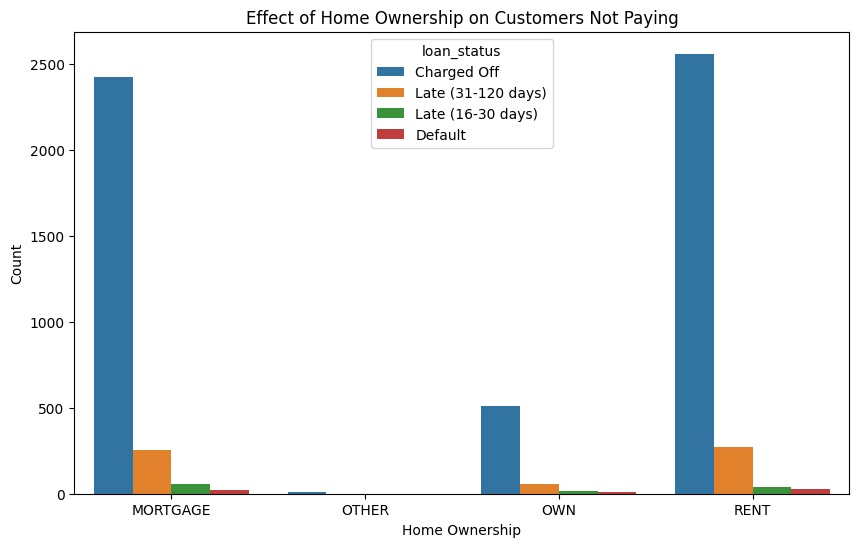

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df_loss, order=sorted(df_loss['home_ownership'].unique()))
plt.title('Effect of Home Ownership on Customers Not Paying')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

- `grade`

We see the same with the loan grade of B, C or D.

In [ ]:
import plotly.express as px

grade_data = df_loss.groupby(['grade'])['grade'].count().reset_index(name='count')

fig = px.pie(grade_data, values='count', names='grade', title='Grades of loans with Charged Off, Defaulted or Late status')
fig.show()

Text(0, 0.5, 'Count')

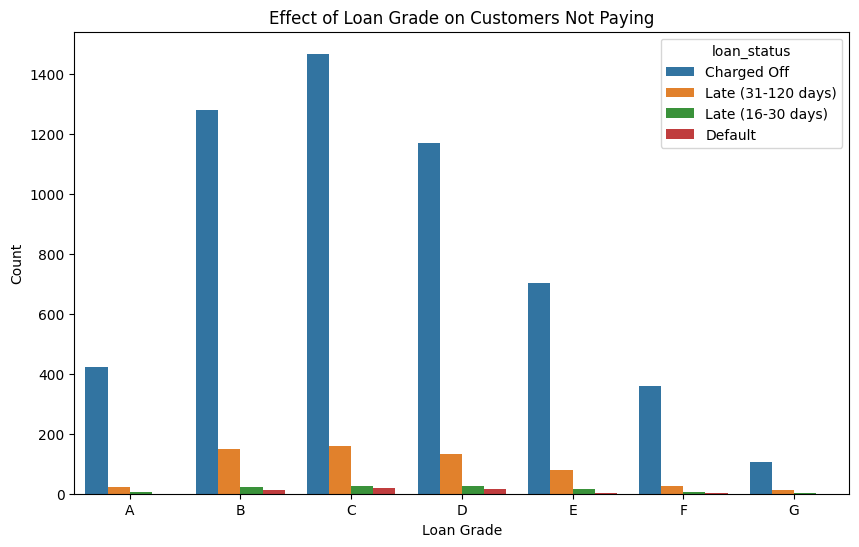

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=df_loss, order=sorted(df_loss['grade'].unique()))
plt.title('Effect of Loan Grade on Customers Not Paying')
plt.xlabel('Loan Grade')
plt.ylabel('Count')